## Data Visualization Section

Descripstion in here

In [1]:
# Import Library

import pandas as pd
import numpy as np

In [3]:
# Read the dataset

test = pd.read_csv("dataset/Testing_set_ccpp.csv")
train = pd.read_csv("dataset/Training_set_ccpp.csv")

In [4]:
test.head() # Show five first rows of dataset

,AT,EV,AP,RH
0,19.64,48.06,1014.81,74.96
1,28.26,69.23,1013.01,42.10
2,27.98,67.17,1007.32,75.29
3,28.64,69.23,1013.11,37.13
4,9.34,38.08,1019.56,67.74


In [5]:
train.head() # Show five first rows of dataset

,AT,EV,AP,RH,PE
0,29.95,73.42,1011.44,66.32,432.81
1,5.76,40.07,1013.22,62.99,494.67
2,29.44,64.33,1011.40,61.78,442.32
3,32.83,74.33,1011.44,50.42,427.36
4,16.86,39.63,1004.47,83.50,466.68


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6410 entries, 0 to 6409
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      6410 non-null   float64
 1   EV      6410 non-null   float64
 2   AP      6410 non-null   float64
 3   RH      6410 non-null   float64
 4   PE      6410 non-null   float64
dtypes: float64(5)
memory usage: 250.5 KB


In [7]:
train.count()

AT    6410
EV    6410
AP    6410
RH    6410
PE    6410
dtype: int64

From the output above, we can see that every column has same count of value. So, the dataset is ready to use.



In [8]:
import seaborn as sns # Import seaborn

In [9]:
def splot (df, x, y):
    plot = sns.scatterplot(data=df, x=x, y=y).set(title='Correlation Between ' + x + ' and ' + y)


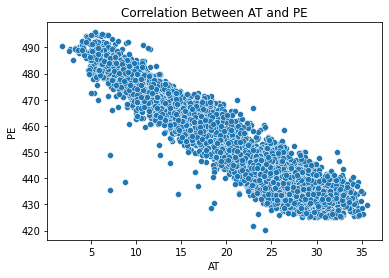

In [10]:
splot (train, "AT", "PE")

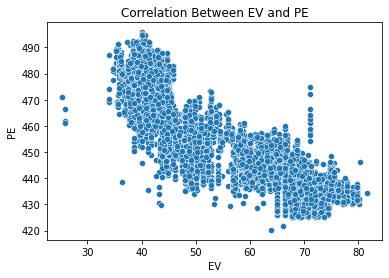

In [11]:
splot (train, "EV", "PE")

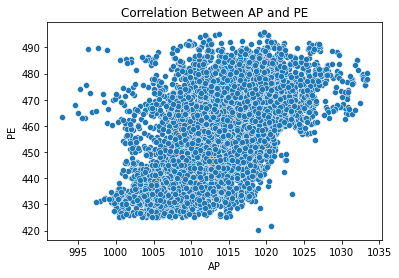

In [12]:
splot (train, "AP", "PE")

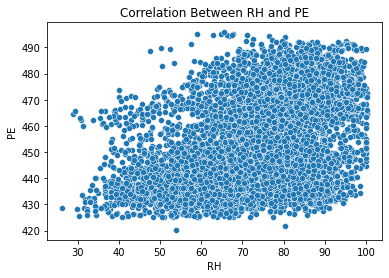

In [13]:
splot (train, "RH", "PE")

In [14]:
import matplotlib.pyplot as plt

In [15]:
train.corr()

,AT,EV,AP,RH,PE
AT,1.000000,0.842640,-0.507147,-0.547406,-0.948487
EV,0.842640,1.000000,-0.413284,-0.310806,-0.869070
AP,-0.507147,-0.413284,1.000000,0.110869,0.514595
RH,-0.547406,-0.310806,0.110869,1.000000,0.393906
PE,-0.948487,-0.869070,0.514595,0.393906,1.000000


<AxesSubplot: >

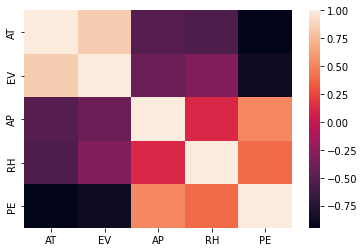

In [16]:
sns.heatmap(train.corr()) # show heatmap figure

In [17]:
def bplot (df, x, axis):
    sns.boxplot(data=df, x=x, ax=axs[axis]).set(title= "Boxplot of "+x)

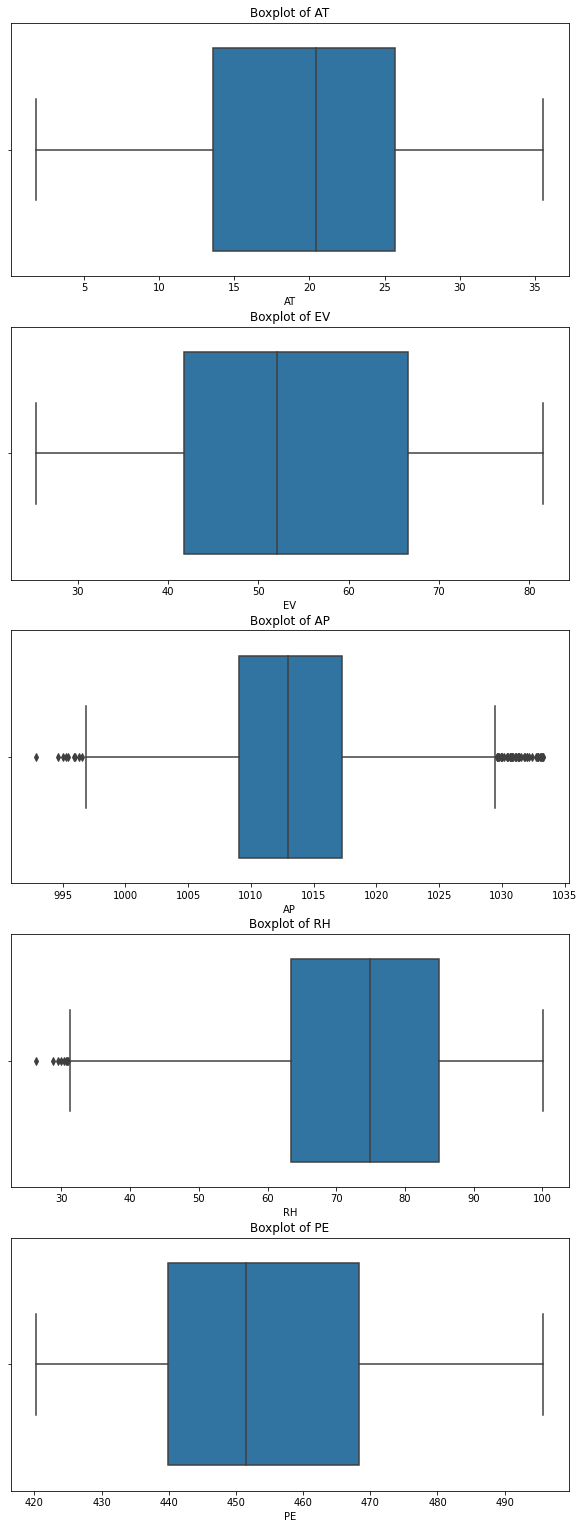

In [19]:
# Show box plot every valiables (columns)


fig, axs = plt.subplots(5, 1, figsize=(10, 27))
bplot(train, "AT", 0)
bplot(train, "EV", 1)
bplot(train, "AP", 2)
bplot(train, "RH", 3)
bplot(train, "PE", 4)
plt.show()


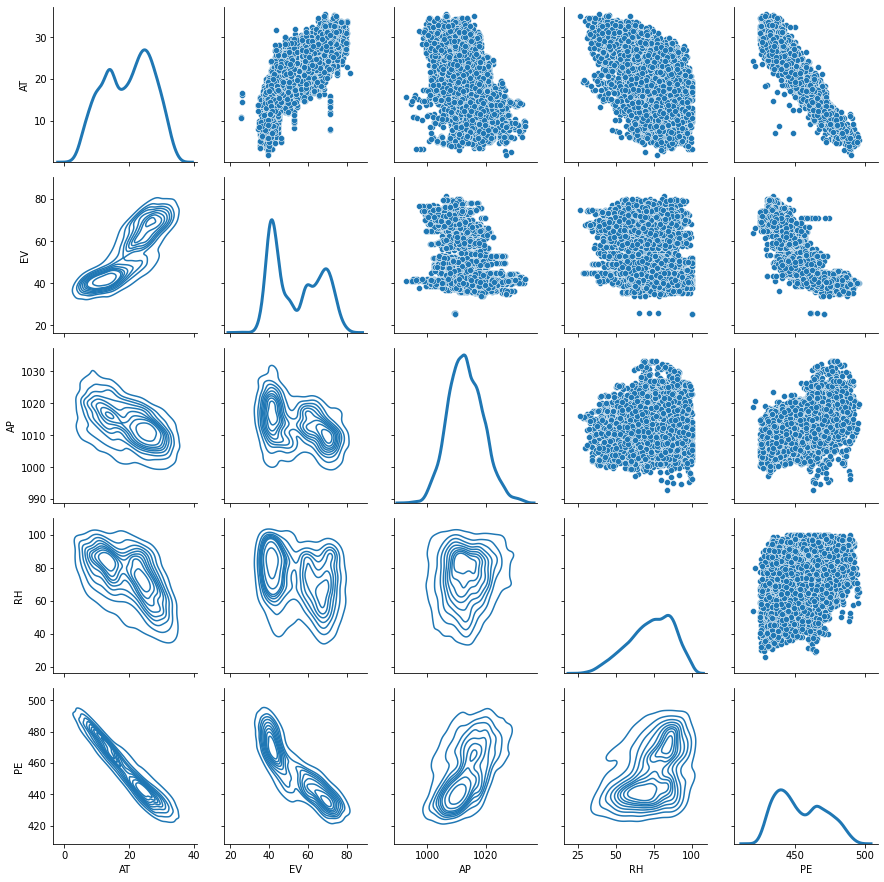

In [20]:
g = sns.PairGrid(train)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)

From the figure above, can be concluded that correlation between PE and AT is excellent to predict each others (just my opinion based on the graph).

In the next section we will use linear regression to predict PE based on (1) AT, (2) AT and EV, as well as based on (3) AT, EV, AP and RH. So, there will be 3 equations.

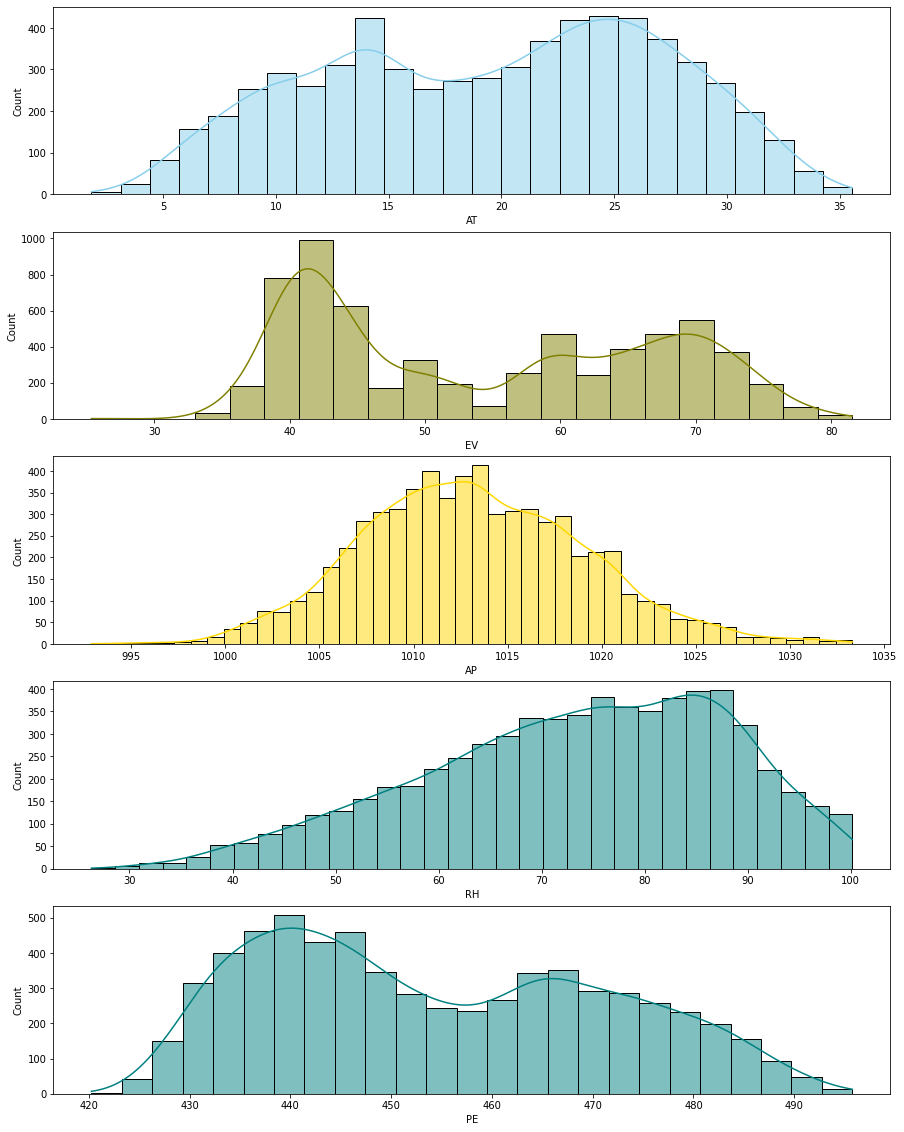

In [21]:

fig, axs = plt.subplots(5, 1, figsize=(15, 20))

sns.histplot(data=train, x="AT", kde=True, color="skyblue", ax=axs[0])
sns.histplot(data=train, x="EV", kde=True, color="olive", ax=axs[1])
sns.histplot(data=train, x="AP", kde=True, color="gold", ax=axs[2])
sns.histplot(data=train, x="RH", kde=True, color="teal", ax=axs[3])
sns.histplot(data=train, x="PE", kde=True, color="teal", ax=axs[4])

plt.show()